<a href="https://colab.research.google.com/github/Nedzelskij/ML_lab4/blob/main/ml_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score


# 1. Відкрити та зчитати наданий файл з даними.

In [126]:
df = pd.read_csv('dataset2_l4.txt', sep=',')
df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
5,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
6,0.389513,-0.220579,-3.210528,-2.624155,0.261718,-0.764757,0.484429,-0.597510,-0.372457,-0.810261,A
7,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,-0.842014,F
8,0.500607,0.140576,0.388552,-0.637358,0.261718,-0.681707,0.295677,0.931046,0.500624,-0.642297,H
9,-0.252367,0.069915,0.246296,0.523550,0.261718,-1.221530,0.899684,1.373076,0.625350,-1.400890,E


# 2. Визначити та вивести кількість записів.

In [127]:
print("Кількість записів у файлі: ", df.shape[0])

Кількість записів у файлі:  8250


# 3. Вивести атрибути набору даних.

In [128]:
print("Атрибути набору даних: ", ", ".join(df.columns))

Атрибути набору даних:  F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, Class


# 4. З’ясувати збалансованість набору даних.

In [129]:
df['Class'].value_counts()

Class
A    3422
F    1547
E     874
I     661
H     410
X     405
G     357
D     279
Y     208
C      87
Name: count, dtype: int64

# 5. Отримати двадцять варіантів перемішування набору даних та розділення його на навчальну (тренувальну) та тестову вибірки, використовуючи функцію ShuffleSplit. Сформувати начальну та тестові вибірки на основі обраного користувачем варіанту .

In [130]:
def user_input_for_select_shuffle_split_number(n: int) -> int:
  try:
    selected_variant = int(input(f'Виберіть номер варіанту від 1 до {n}: ')) - 1
    if selected_variant < 0 or selected_variant >= n:
      print('\nВведене число виходить за визначені межі!\n')
      return user_input_for_select_shuffle_split_number(n)
  except:
    print('\nВведене число не є натуральним!\n')
    return user_input_for_select_shuffle_split_number(n)

  return selected_variant

In [131]:
test_size = 0.2
n_splits = 20

shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=5)

split_variants = []
for train_index, test_index in shuffle_split.split(df):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]
    split_variants.append((train_df, test_df))

selected_variant = user_input_for_select_shuffle_split_number(n_splits)

train_df_selected, test_df_selected = split_variants[selected_variant]

test_df_selected.head(10)

Виберіть номер варіанту від 1 до 20: 5


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
8084,0.019197,-0.016448,-3.210528,-0.310423,0.261718,0.148790,0.182426,0.800904,0.718895,0.152824,A
6070,0.080916,0.203385,0.310311,0.269510,0.261718,0.771662,0.559930,-0.401142,0.313536,0.495394,H
6830,-0.017834,0.132725,0.125378,1.357345,0.261718,0.314889,0.220177,1.068099,-0.123005,0.282175,A
788,4.462983,-0.181323,0.306755,-2.963951,0.261718,-0.058835,0.031425,0.680490,-0.029461,0.053730,F
2634,-0.252367,-0.008597,-2.044028,0.342613,0.351096,-1.055431,0.710932,2.314238,2.433876,-1.173976,X
1215,-0.017834,-0.047852,0.093371,-0.139302,0.261718,-0.141884,0.673182,0.015104,-0.341275,-0.362570,A
5612,0.944986,0.132725,0.136047,0.564936,0.172340,-0.224934,0.371178,0.028501,-0.715453,-0.274085,A
5906,-0.005490,-0.204876,0.320980,-0.694588,0.261718,-0.806282,0.408929,0.890390,0.064084,-0.820700,F
7771,0.599358,-2.426761,0.011573,0.540260,0.976743,-0.598658,-1.327590,1.376649,2.340331,0.366693,I
2160,-0.227680,0.046362,0.214288,0.746888,0.261718,-0.889332,-0.006326,1.601324,0.874802,-0.694351,E


# 6. Використовуючи функцію KNeighborsClassifier бібліотеки scikit-learn, збудувати класифікаційну модель на основі методу k найближчих сусідів (кількість сусідів обрати самостійно, вибір аргументувати) та навчити її на тренувальній вибірці, вважаючи, що цільова характеристика визначається стовпчиком Class, а всі інші виступають вролі вихідних аргументів.

In [132]:
k = 3

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=k)

x_train = train_df_selected.drop(columns=['Class'])
y_train = train_df_selected['Class']
k_neighbors_classifier.fit(x_train, y_train)

x_test = test_df_selected.drop(columns=['Class'])
y_test = test_df_selected['Class']

# 7. Обчислити класифікаційні метрики збудованої моделі для тренувальної та тестової вибірки. Представити результати роботи моделі на тестовій вибірці графічно.

In [133]:
def calculate_all_metrics_for_tree(model: KNeighborsClassifier, x_cord: pd.DataFrame, y_cord: pd.Series)-> dict:
    all_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f_scores': 0,
                  'MCC': 0, 'BA': 0}

    model_predictions = model.predict(x_cord)

    all_metrics['accuracy'] = accuracy_score(y_cord, model_predictions)
    all_metrics['precision'] = precision_score(y_cord, model_predictions, average='weighted')
    all_metrics['recall'] = recall_score(y_cord, model_predictions, average='weighted')
    all_metrics['f_scores'] = f1_score(y_cord, model_predictions, average='weighted')
    all_metrics['MCC'] = matthews_corrcoef(y_cord, model_predictions)
    all_metrics['BA'] = balanced_accuracy_score(y_cord, model_predictions)

    return all_metrics


metrics_test_df = calculate_all_metrics_for_tree(k_neighbors_classifier, x_test, y_test)
metrics_train_df = calculate_all_metrics_for_tree(k_neighbors_classifier, x_train, y_train)

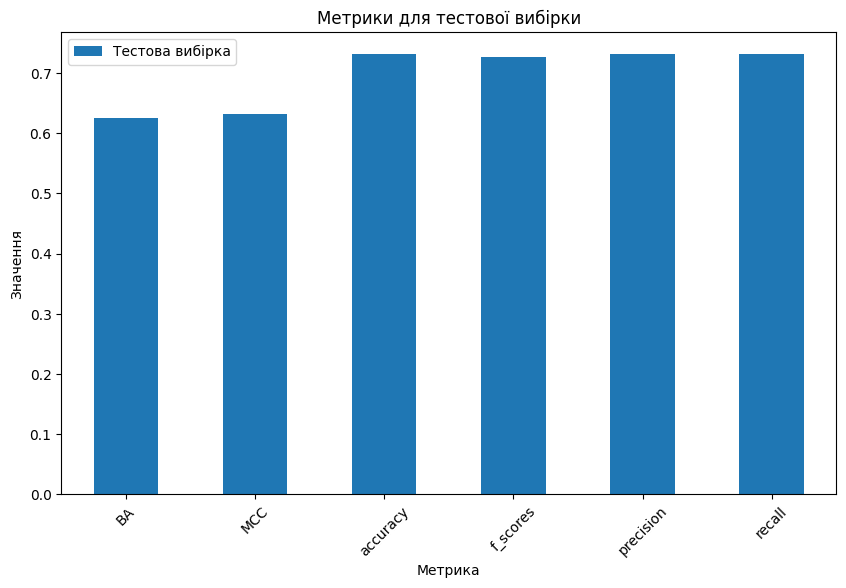

In [134]:
df_test_graph = pd.DataFrame({'Тестова вибірка': metrics_test_df})

df_test_graph.plot(kind='bar', figsize=(10, 6))
plt.title('Метрики для тестової вибірки')
plt.ylabel('Значення')
plt.xlabel('Метрика')
plt.xticks(rotation=45)
plt.legend()
plt.show()

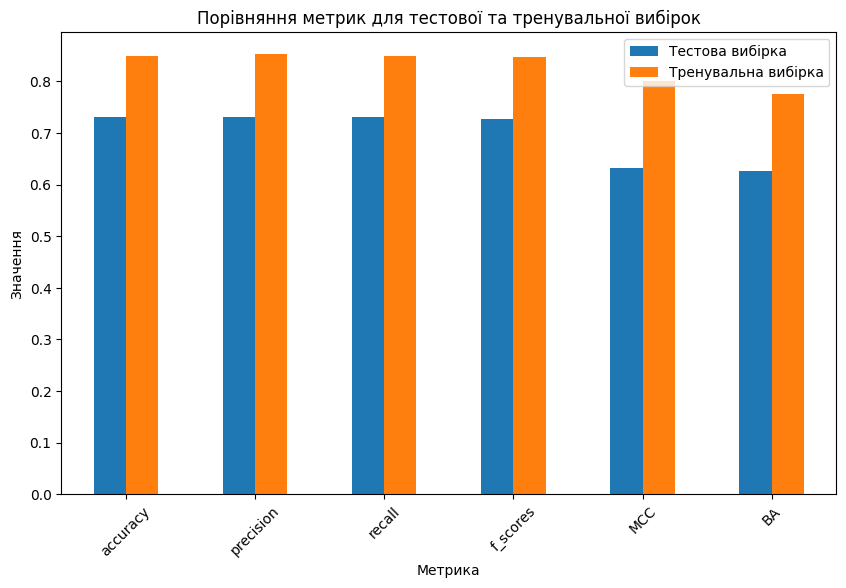

In [135]:
df_test_train_graph = pd.DataFrame({'Тестова вибірка': metrics_test_df, 'Тренувальна вибірка': metrics_train_df})

df_test_train_graph.plot(kind='bar', figsize=(10, 6))
plt.title('Порівняння метрик для тестової та тренувальної вибірок')
plt.ylabel('Значення')
plt.xlabel('Метрика')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 8. Обрати алгоритм KDTree та з’ясувати вплив розміру листа (від 20 до 200 з кроком 5) на результати класифікації. Результати представити графічно.

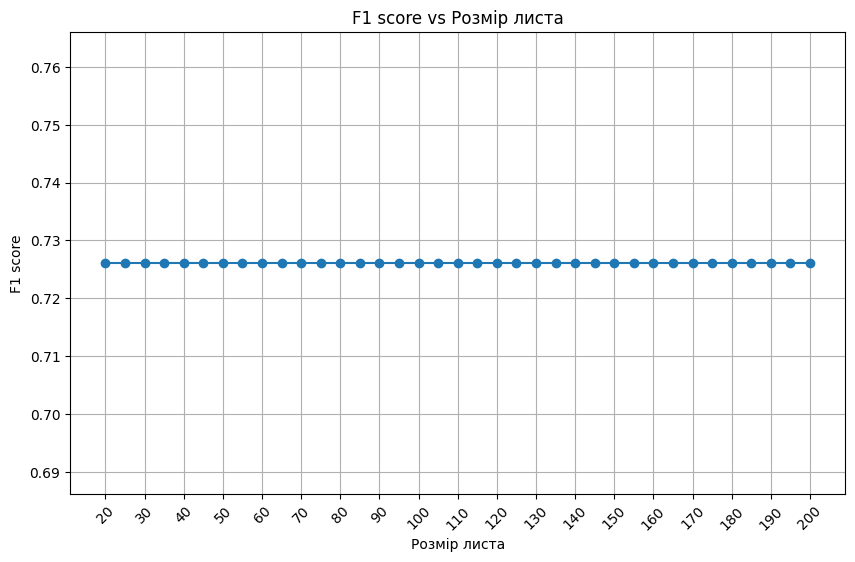

In [136]:
f_scores_values = []
leaf_sizes = range(20, 201, 5)

for leaf_size in leaf_sizes:
    model = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', leaf_size=leaf_size)
    model.fit(x_train, y_train)

    model_predictions = model.predict(x_test)
    f_scores = f1_score(y_test, model_predictions, average='weighted')

    f_scores_values.append(f_scores)


plt.figure(figsize=(10, 6))
plt.plot(leaf_sizes, f_scores_values, marker='o', linestyle='-')
plt.title('F1 score vs Розмір листа')
plt.xlabel('Розмір листа')
plt.ylabel('F1 score')
plt.xticks(np.arange(min(leaf_sizes), max(leaf_sizes)+1, 10), rotation=45)
plt.grid()
plt.show()